# Load & Inspect Raw Data

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# data inspection

from google.colab import files
file_name = "all_stocks_5yr.csv"
df = pd.read_csv(file_name)

print("Columns:", df.columns)
print("Sample Data:")
print(df.head())


Columns: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
Sample Data:
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [ ]:
#summary

df.info()
print(df.describe())
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
                open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75

In [ ]:
#cleaning up missing values

print("Missing Values Before Cleaning:\n", df.isnull().sum())

df['open'] = df['open'].ffill()
df['high'] = df['high'].ffill()
df['low'] = df['low'].ffill()

print("\nMissing Values After Cleaning:\n", df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

print(df.dtypes)

df.rename(columns={
    'Name': 'ticker',
    'date': 'date',
    'open': 'open_price',
    'high': 'high_price',
    'low': 'low_price',
    'close': 'close_price',
    'volume': 'trade_volume'
}, inplace=True)




Missing Values Before Cleaning:
 date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

Missing Values After Cleaning:
 date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object


In [ ]:
# assign unique numeric IDs to each stock ticker and create a reference table (stocks_df)
# this helps normalize the dataset and reduces redundancy by replacing ticker strings with integer IDs
stocks_df = df[['ticker']].drop_duplicates().reset_index(drop=True)
stocks_df['stock_id'] = range(1, len(stocks_df) + 1)


# print information for the stock with stock_id = 60
print("Stocks Table:")
print(stocks_df[stocks_df['stock_id'] == 60])

# create a mapping from ticker symbol to stock_id and apply it to the main dataframe
stock_id_map = stocks_df.set_index('ticker')['stock_id'].to_dict()
df['stock_id'] = df['ticker'].map(stock_id_map)

# prepare the cleaned 'raw_data_df' table with selected features and stock_id for further analysis
raw_data_df = df[['stock_id', 'date', 'open_price', 'high_price', 'low_price', 'close_price', 'trade_volume']]
print("Raw Data Table:")
print(raw_data_df.head())


Stocks Table:
   ticker  stock_id
59    BAC        60
Raw Data Table:
   stock_id       date  open_price  high_price  low_price  close_price  \
0         1 2013-02-08       15.07       15.12      14.63        14.75   
1         1 2013-02-11       14.89       15.01      14.26        14.46   
2         1 2013-02-12       14.45       14.51      14.10        14.27   
3         1 2013-02-13       14.30       14.94      14.25        14.66   
4         1 2013-02-14       14.94       14.96      13.16        13.99   

   trade_volume  
0       8407500  
1       8882000  
2       8126000  
3      10259500  
4      31879900  


# Exploratory Data Analysis

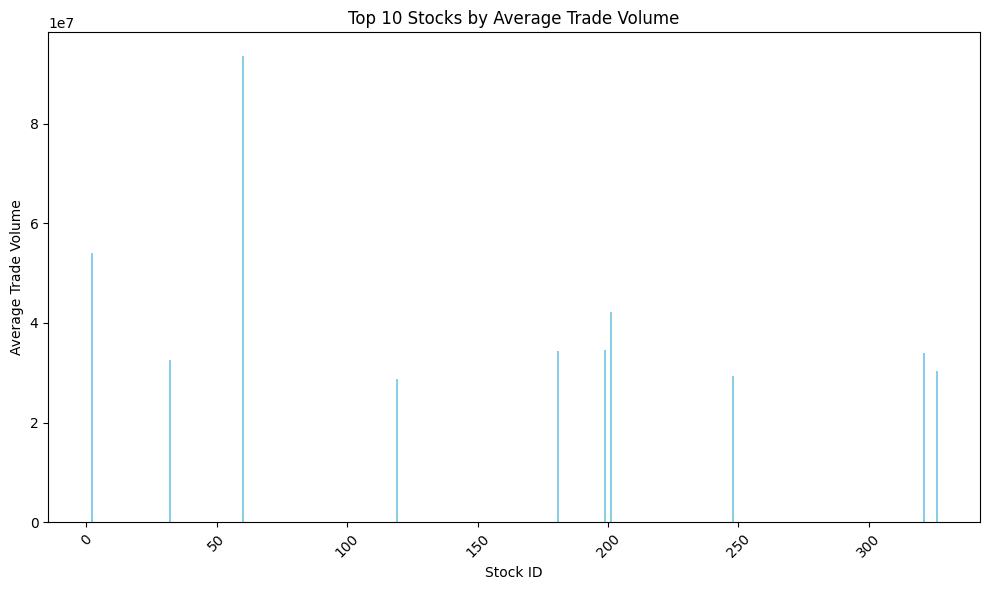

In [ ]:
# group by stock_id and calculate average trade volume
top_trade_volume = (
    raw_data_df.groupby('stock_id')['trade_volume']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_trade_volume['stock_id'], top_trade_volume['trade_volume'], color='skyblue')
plt.title('Top 10 Stocks by Average Trade Volume')
plt.xlabel('Stock ID')
plt.ylabel('Average Trade Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


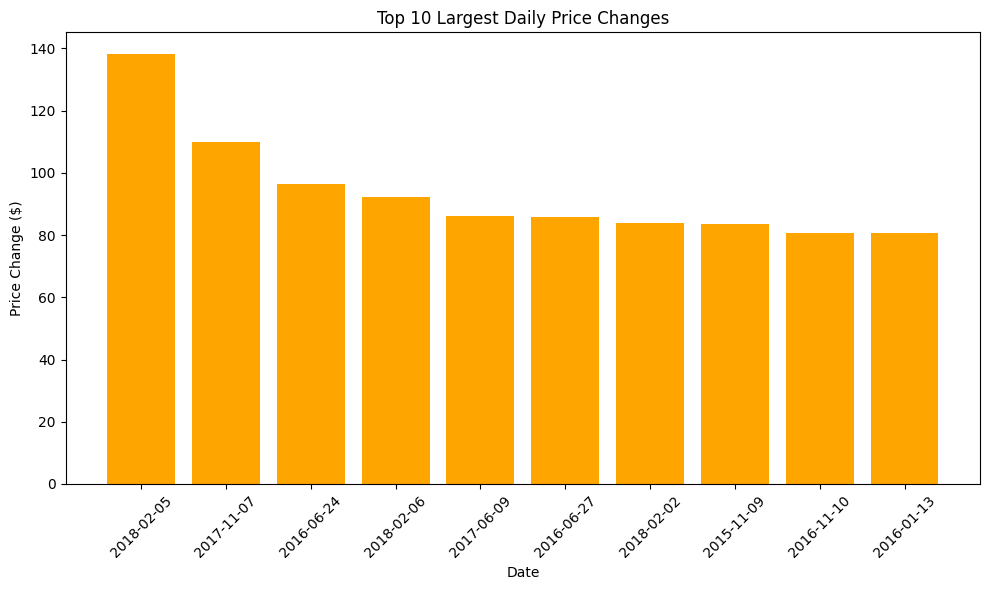

In [ ]:
# create a new column for daily price change
raw_data_df['price_change'] = raw_data_df['high_price'] - raw_data_df['low_price']

# sort by price change and take the top 10
price_changes = (
    raw_data_df[['stock_id', 'date', 'price_change']]
    .sort_values(by='price_change', ascending=False)
    .head(10)
)

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(price_changes['date'].astype(str), price_changes['price_change'], color='orange')
plt.title('Top 10 Largest Daily Price Changes')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


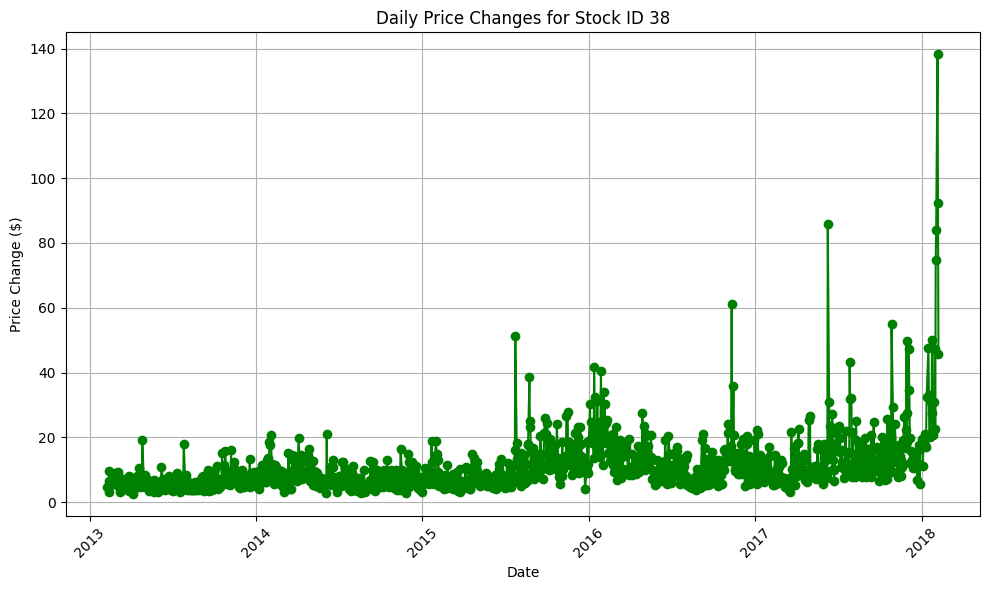

In [ ]:
# filter for stock_id = 38
stock_df = raw_data_df[raw_data_df['stock_id'] == 38].copy()

# calculate daily price change
stock_df['price_change'] = stock_df['high_price'] - stock_df['low_price']

# sort by date
stock_df = stock_df.sort_values(by='date')

# time-series plot
plt.figure(figsize=(10, 6))
plt.plot(stock_df['date'], stock_df['price_change'], color='green', marker='o')
plt.title('Daily Price Changes for Stock ID 38')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


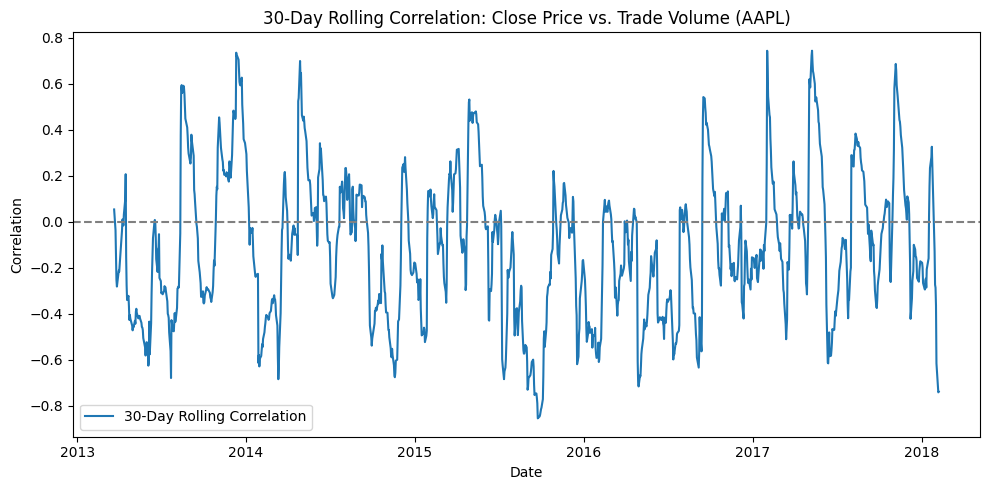

In [ ]:
aapl_df = df[df['ticker'] == 'AAPL'].sort_values('date')
rolling_corr = (
    aapl_df[['close_price', 'trade_volume']]
    .rolling(window=30)
    .corr()
    .unstack()
    .iloc[:, 1]
)
plt.figure(figsize=(10, 5))
plt.plot(aapl_df['date'], rolling_corr, label='30-Day Rolling Correlation')
plt.axhline(0, color='gray', linestyle='--')
plt.title('30-Day Rolling Correlation: Close Price vs. Trade Volume (AAPL)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.tight_layout()
plt.show()


# Unsupervised Learning / Clustering

In [ ]:
# sort the DataFrame by stock_id and date to match original query behavior
stock_data = raw_data_df[['stock_id', 'date', 'open_price', 'close_price','trade_volume']].copy()
stock_data = stock_data.sort_values(by=['stock_id', 'date'])

# compute daily return
stock_data['daily_return'] = (stock_data['close_price'] - stock_data['open_price']) / stock_data['open_price']

# display first few rows
print(stock_data.head())


   stock_id       date  open_price  close_price  trade_volume  daily_return
0         1 2013-02-08       15.07        14.75       8407500     -0.021234
1         1 2013-02-11       14.89        14.46       8882000     -0.028878
2         1 2013-02-12       14.45        14.27       8126000     -0.012457
3         1 2013-02-13       14.30        14.66      10259500      0.025175
4         1 2013-02-14       14.94        13.99      31879900     -0.063588


In [ ]:
# sort by stock_id and date
stock_data = stock_data.sort_values(by=['stock_id', 'date'])

# compute 20-day and 50-day moving averages
stock_data['ma_20'] = stock_data.groupby('stock_id')['close_price'].transform(lambda x: x.rolling(window=20).mean())
stock_data['ma_50'] = stock_data.groupby('stock_id')['close_price'].transform(lambda x: x.rolling(window=50).mean())

# display the result
print(stock_data[['stock_id', 'date', 'close_price', 'ma_20', 'ma_50']].head(30))



    stock_id       date  close_price    ma_20  ma_50
0          1 2013-02-08        14.75      NaN    NaN
1          1 2013-02-11        14.46      NaN    NaN
2          1 2013-02-12        14.27      NaN    NaN
3          1 2013-02-13        14.66      NaN    NaN
4          1 2013-02-14        13.99      NaN    NaN
5          1 2013-02-15        14.50      NaN    NaN
6          1 2013-02-19        14.26      NaN    NaN
7          1 2013-02-20        13.33      NaN    NaN
8          1 2013-02-21        13.37      NaN    NaN
9          1 2013-02-22        13.57      NaN    NaN
10         1 2013-02-25        13.02      NaN    NaN
11         1 2013-02-26        13.26      NaN    NaN
12         1 2013-02-27        13.41      NaN    NaN
13         1 2013-02-28        13.43      NaN    NaN
14         1 2013-03-01        13.61      NaN    NaN
15         1 2013-03-04        13.90      NaN    NaN
16         1 2013-03-05        14.05      NaN    NaN
17         1 2013-03-06        14.57      NaN 

In [ ]:
# compute rolling standard deviation of daily returns (20-day window)
stock_data['volatility'] = stock_data.groupby('stock_id')['daily_return'].transform(lambda x: x.rolling(window=20).std())

print(stock_data[['stock_id', 'date', 'daily_return', 'volatility']].head(30))


    stock_id       date  daily_return  volatility
0          1 2013-02-08     -0.021234         NaN
1          1 2013-02-11     -0.028878         NaN
2          1 2013-02-12     -0.012457         NaN
3          1 2013-02-13      0.025175         NaN
4          1 2013-02-14     -0.063588         NaN
5          1 2013-02-15      0.040919         NaN
6          1 2013-02-19     -0.004885         NaN
7          1 2013-02-20     -0.059280         NaN
8          1 2013-02-21     -0.018355         NaN
9          1 2013-02-22      0.000000         NaN
10         1 2013-02-25     -0.042647         NaN
11         1 2013-02-26      0.009132         NaN
12         1 2013-02-27      0.009789         NaN
13         1 2013-02-28     -0.004448         NaN
14         1 2013-03-01      0.017951         NaN
15         1 2013-03-04      0.029630         NaN
16         1 2013-03-05      0.002855         NaN
17         1 2013-03-06      0.003444         NaN
18         1 2013-03-07      0.008163         NaN


In [ ]:
# group by stock and calculate relevant features
print(stock_data.info())
stock_summary = stock_data.groupby('stock_id').agg({
    'daily_return': 'mean',
    'volatility': 'mean',
    'close_price': 'mean',
    'trade_volume': 'mean'
}).rename(columns={
    'daily_return': 'avg_return',
    'volatility': 'avg_volatility',
    'close_price': 'avg_price',
    'trade_volume': 'avg_volume'
}).reset_index()

# optional: add Sharpe ratio if you calculated it earlier
stock_summary['sharpe_ratio'] = stock_summary['avg_return'] / stock_summary['avg_volatility']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   stock_id      619040 non-null  int64         
 1   date          619040 non-null  datetime64[ns]
 2   open_price    619040 non-null  float64       
 3   close_price   619040 non-null  float64       
 4   trade_volume  619040 non-null  int64         
 5   daily_return  619040 non-null  float64       
 6   ma_20         609445 non-null  float64       
 7   ma_50         594300 non-null  float64       
 8   volatility    609445 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 42.5 MB
None


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['avg_return', 'avg_volatility', 'avg_volume', 'sharpe_ratio']
X = stock_summary[features].fillna(0)  # fill NaNs just in case
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
stock_summary['cluster'] = kmeans.fit_predict(X_scaled)


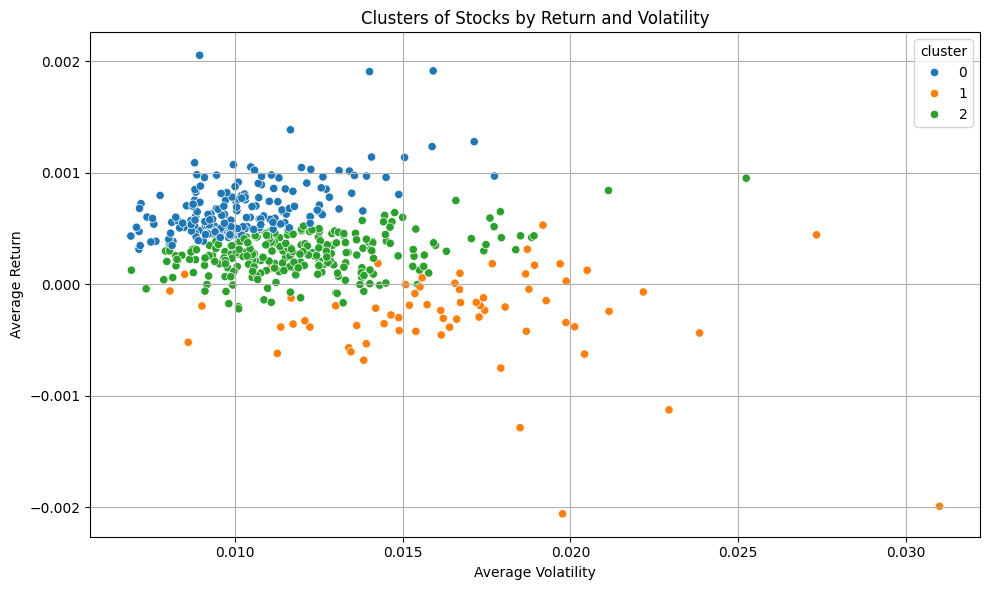

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=stock_summary,
    x='avg_volatility',
    y='avg_return',
    hue='cluster',
    palette='tab10'
)
plt.title('Clusters of Stocks by Return and Volatility')
plt.xlabel('Average Volatility')
plt.ylabel('Average Return')
plt.grid(True)
plt.tight_layout()
plt.show()
